# Imports

In [9]:
import networkx
import matplotlib.pyplot as plt
import utils
import rnn_util

import random
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

import time
import math
import matplotlib.ticker as ticker


# Graph generator

In [3]:
nx = networkx.newman_watts_strogatz_graph(100,4, 0.5, seed=None)
g = utils.nx2Graph(nx) # Converts networkx graph to our Graph class 

# Show Graph

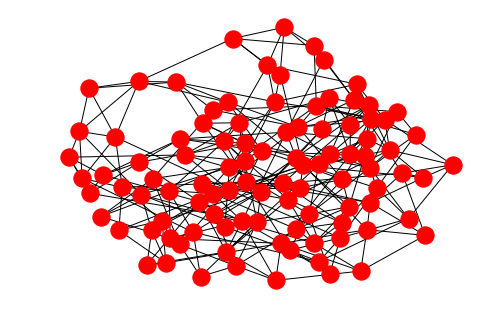

In [4]:
networkx.draw(nx)
plt.show()

# Dataset

In [5]:
nr_samples = 10000
X,y = utils.BuildDatatasetRNN(g,nr_samples)
X_train, y_train, X_test, y_test = utils.splitTrainTest(X,y,0.3)

# Create Model

In [6]:
hidden_size = 256
encoder1 = rnn_util.EncoderRNN(1001, hidden_size)
attn_decoder1 = rnn_util.AttnDecoderRNN(hidden_size, 1001, dropout_p=0.1)


# Train

In [7]:
rnn_util.trainIters(encoder1, attn_decoder1,list(zip(X_train,y_train)), print_every=100)

0m 1s (- 1m 19s) (100 1%) 4.3402
0m 2s (- 1m 16s) (200 2%) 3.5106
0m 3s (- 1m 18s) (300 4%) 3.7672
0m 4s (- 1m 19s) (400 5%) 4.0769
0m 6s (- 1m 19s) (500 7%) 3.6809
0m 7s (- 1m 18s) (600 8%) 3.8839
0m 8s (- 1m 17s) (700 10%) 3.6858
0m 9s (- 1m 16s) (800 11%) 3.6469
0m 11s (- 1m 15s) (900 12%) 3.6775
0m 12s (- 1m 14s) (1000 14%) 3.6462
0m 13s (- 1m 12s) (1100 15%) 3.6031
0m 14s (- 1m 11s) (1200 17%) 3.6290
0m 16s (- 1m 10s) (1300 18%) 3.5889
0m 17s (- 1m 9s) (1400 20%) 3.5215
0m 18s (- 1m 8s) (1500 21%) 3.4576
0m 20s (- 1m 7s) (1600 22%) 3.3417
0m 21s (- 1m 6s) (1700 24%) 3.3586
0m 22s (- 1m 5s) (1800 25%) 3.1662
0m 23s (- 1m 4s) (1900 27%) 3.2739
0m 25s (- 1m 3s) (2000 28%) 3.2704
0m 26s (- 1m 1s) (2100 30%) 2.8284
0m 27s (- 1m 0s) (2200 31%) 3.0180
0m 29s (- 0m 59s) (2300 32%) 2.9966
0m 30s (- 0m 58s) (2400 34%) 2.8469
0m 31s (- 0m 57s) (2500 35%) 2.8189
0m 33s (- 0m 56s) (2600 37%) 2.6781
0m 34s (- 0m 54s) (2700 38%) 2.6045
0m 35s (- 0m 53s) (2800 40%) 2.5746
0m 37s (- 0m 52s) (2900 

# Evaluate

In [11]:
preds = utils.getPreds(encoder1, attn_decoder1,X_test)
acc = utils.checkAccuracy(y_test,preds)
utils.getNumberValids(g,preds)

NameError: name 'encoder1' is not defined